In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from textblob import TextBlob

# Optional: Set style
sns.set(style='whitegrid')


In [2]:
df = pd.read_csv('INvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [3]:
with open('IN_category_id.json', 'r') as f:
    categories = json.load(f)

category_mapping = {}
for item in categories['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']

df['category'] = df['category_id'].map(category_mapping)


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
category                  105
dtype: int64

In [5]:
df['tags'] = df['tags'].apply(lambda x: x.replace('|', ', '))


In [6]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour


<Axes: title={'center': 'Avg Views by Category'}, xlabel='category'>

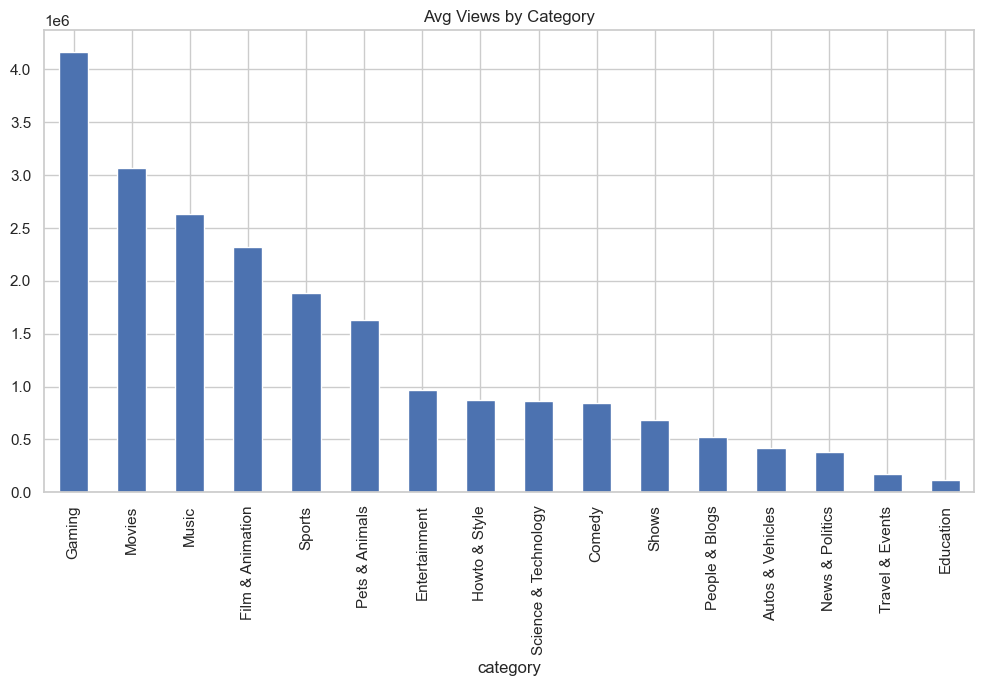

In [7]:
top_categories = df.groupby('category')['views'].mean().sort_values(ascending=False)
top_categories.plot(kind='bar', figsize=(12,6), title='Avg Views by Category')


<Axes: title={'center': 'Best Hour to Publish (by Avg Views)'}, xlabel='publish_hour'>

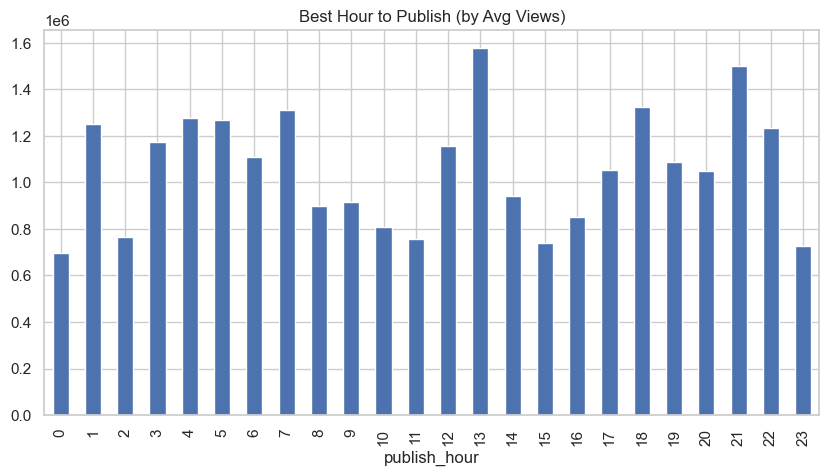

In [8]:
publish_hour = df.groupby('publish_hour')['views'].mean()
publish_hour.plot(kind='bar', figsize=(10,5), title='Best Hour to Publish (by Avg Views)')


Text(0.5, 1.0, 'Sentiment Score Distribution (Title)')

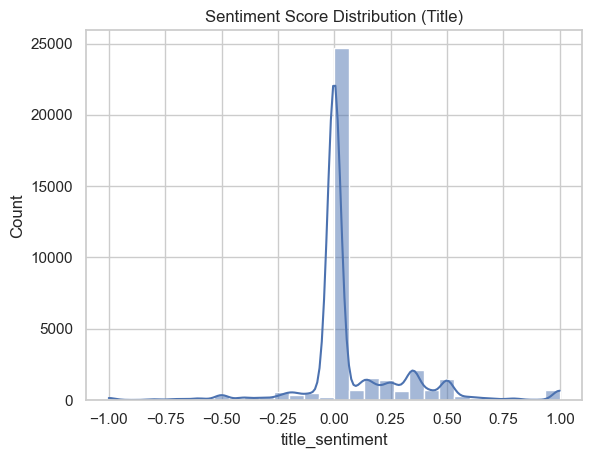

In [9]:
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot
sns.histplot(df['title_sentiment'], kde=True, bins=30)
plt.title("Sentiment Score Distribution (Title)")


<Axes: title={'center': 'Top 10 Longest-Trending Videos'}, xlabel='video_id'>

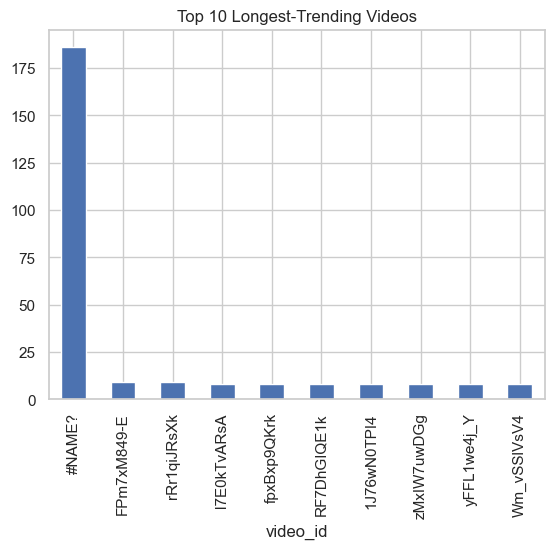

In [10]:
trending_duration = df.groupby('video_id')['trending_date'].nunique()
trending_duration = trending_duration.sort_values(ascending=False).head(10)
trending_duration.plot(kind='bar', title='Top 10 Longest-Trending Videos')


In [11]:
popular_categories = df.groupby("category")["views"].sum().sort_values(ascending=False)
print(popular_categories.head(5))

category
Entertainment       16120390974
Music               10150844485
Film & Animation     3847149504
Comedy               2887672070
News & Politics      1994263812
Name: views, dtype: int64


In [12]:
engagement = df.groupby("category")[["likes", "comment_count"]].mean().sort_values("likes", ascending=False)
print(engagement.head(5))

                        likes  comment_count
category                                    
Pets & Animals  120844.666667   14018.666667
Gaming          101632.242424    9452.106061
Music            65922.378434    4560.671332
Comedy           50777.102945    4026.529017
Sports           45102.580027    3717.755130


In [13]:
top_channels = df["channel_title"].value_counts().head(5)
print(top_channels)


channel_title
VikatanTV         284
etvteluguindia    282
Flowers Comedy    270
ETV Plus India    253
SAB TV            244
Name: count, dtype: int64


In [14]:
# Convert both columns to datetime and remove timezone info (make tz-naive)
df["publish_time"] = pd.to_datetime(df["publish_time"]).dt.tz_localize(None)
df["trending_date"] = pd.to_datetime(df["trending_date"]).dt.tz_localize(None)

# Now calculate the difference in days
df["days_to_trend"] = (df["trending_date"] - df["publish_time"]).dt.days

# Optional: view summary stats
print(df["days_to_trend"].describe())

count    37352.000000
mean         1.087546
std          2.065134
min         -1.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        220.000000
Name: days_to_trend, dtype: float64


In [15]:
df["title_length"] = df["title"].apply(len)
print(df["title_length"].describe())


count    37352.000000
mean        70.563370
std         22.405722
min          5.000000
25%         53.000000
50%         74.000000
75%         91.000000
max        100.000000
Name: title_length, dtype: float64


In [16]:
from collections import Counter
from wordcloud import WordCloud

In [17]:
tag_series = df['tags'].dropna().str.split('|').explode()
tag_counts = tag_series.value_counts().head(5)

C:\Users\chour\AppData\Local\Temp\ipykernel_21452\116348210.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette="viridis")


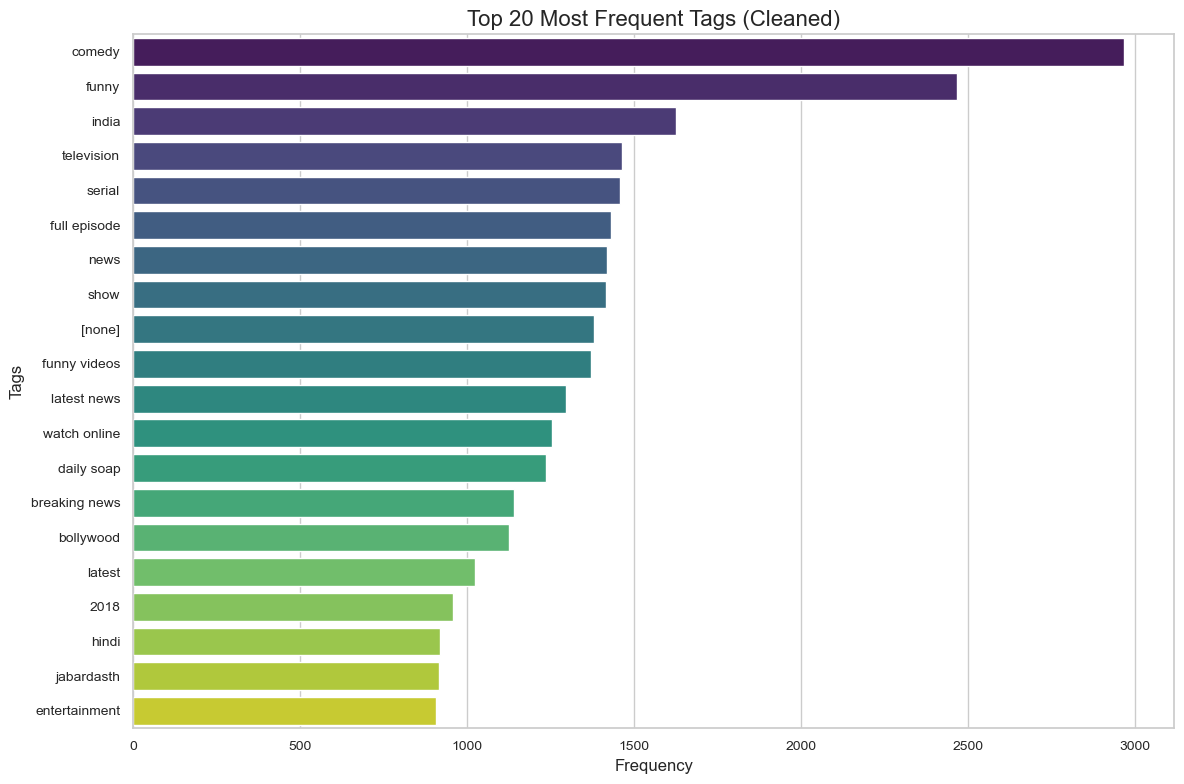

In [18]:
def clean_and_split_tags(tag_string):
    if pd.isna(tag_string):
        return []
    splitters = ['|', ',', '\n']
    for sep in splitters:
        tag_string = tag_string.replace(sep, '|')
    tags = tag_string.split('|')
    clean_tags = [tag.strip(" '\"\n").lower() for tag in tags if tag.strip().lower() not in ['none', 'nan', '']]
    return clean_tags

# Apply to your DataFrame
all_tags = df['tags'].dropna().apply(clean_and_split_tags).explode()

# Count most common tags
top_tags = all_tags.value_counts().head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x=top_tags.values, y=top_tags.index, palette="viridis")
plt.title("Top 20 Most Frequent Tags (Cleaned)", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Tags", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Preprocessing
df["title_length"] = df["title"].astype(str).apply(len)
df["publish_time"] = pd.to_datetime(df["publish_time"])
df["publish_date"] = df["publish_time"].dt.date

# Tag preprocessing
df["tags"] = df["tags"].fillna("[none]")
all_tags = df["tags"].str.lower().str.split("|").explode().str.strip()
top_tags = all_tags.value_counts().head(20).reset_index()
top_tags.columns = ["tag", "count"]

# Views by category
views_by_category = df.groupby("category_id")["views"].sum().reset_index()

# Top Channels
top_channels = df["channel_title"].value_counts().head(20).reset_index()
top_channels.columns = ["channel", "count"]

# Video count over time
videos_over_time = df.groupby("publish_date").size().reset_index(name="video_count")

# Create Dash app
app = dash.Dash(__name__)
app.title = "YouTube India Dashboard"

# Layout
app.layout = html.Div(style={"backgroundColor": "#111", "color": "#fff", "padding": "20px"}, children=[
    html.H1("📺 YouTube India Dashboard", style={"textAlign": "center"}),

    dcc.Graph(
        figure=px.histogram(df, x="title_length", nbins=50, title="Distribution of Title Lengths")
        .update_layout(paper_bgcolor="#111", plot_bgcolor="#111", font_color="#fff")
    ),

    dcc.Graph(
        figure=px.bar(views_by_category, x="category_id", y="views", title="Total Views by Category ID")
        .update_layout(paper_bgcolor="#111", plot_bgcolor="#111", font_color="#fff")
    ),

    dcc.Graph(
        figure=px.bar(top_tags, x="count", y="tag", orientation="h", title="Top 20 Most Frequent Tags")
        .update_layout(paper_bgcolor="#111", plot_bgcolor="#111", font_color="#fff", yaxis=dict(categoryorder="total ascending"))
    ),

    dcc.Graph(
        figure=px.bar(top_channels, x="count", y="channel", orientation="h", title="Top 20 Most Frequent Channels")
        .update_layout(paper_bgcolor="#111", plot_bgcolor="#111", font_color="#fff", yaxis=dict(categoryorder="total ascending"))
    ),

    dcc.Graph(
        figure=px.line(videos_over_time, x="publish_date", y="video_count", title="Videos Published Over Time")
        .update_layout(paper_bgcolor="#111", plot_bgcolor="#111", font_color="#fff")
    )
])

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True)

AttributeError: module 'narwhals.stable.v1' has no attribute 'DataFrame'